# Datenexploration für Schlafqualität-Vorhersage


Ergebnisse für Linear Regression:
Mean Squared Error: 0.3196
R2 Score: 0.9632

Ergebnisse für Random Forest:
Mean Squared Error: 0.0336
R2 Score: 0.9961

Ergebnisse für XGBoost:
Mean Squared Error: 0.0306
R2 Score: 0.9965


<Figure size 1000x600 with 0 Axes>

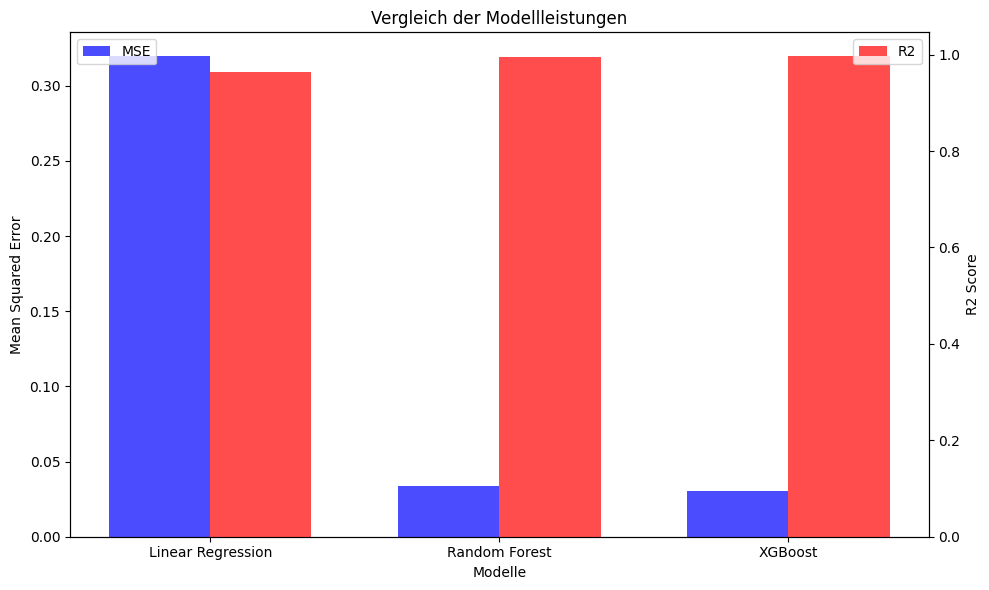

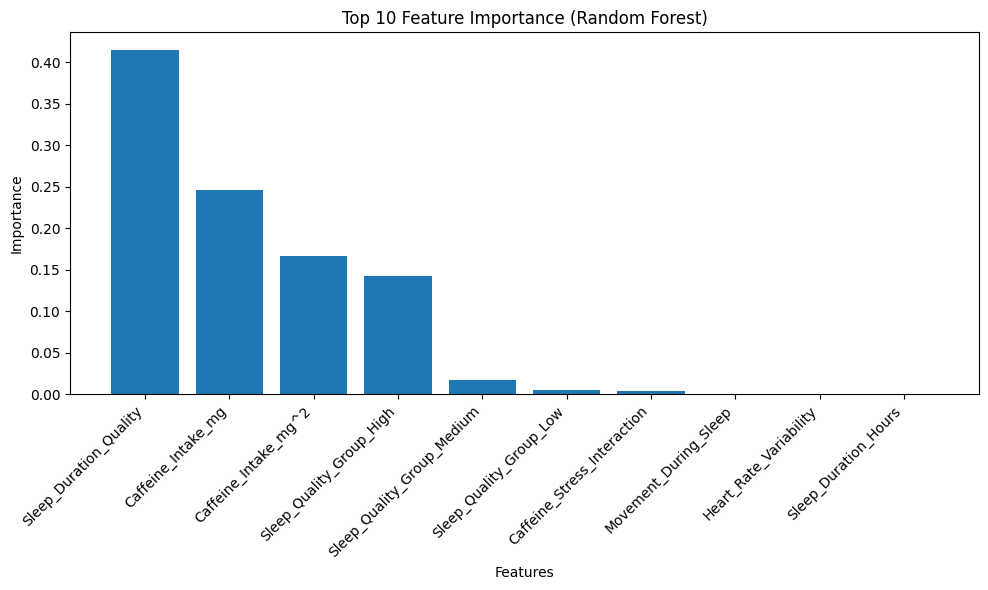

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Laden der aufbereiteten Daten
train_data = pd.read_csv('../data/train_data.csv')
test_data = pd.read_csv('../data/test_data.csv')

# 2. Trennen von Features und Ziel
X_train = train_data.drop('Sleep_Quality_Score', axis=1)
y_train = train_data['Sleep_Quality_Score']
X_test = test_data.drop('Sleep_Quality_Score', axis=1)
y_test = test_data['Sleep_Quality_Score']

# 3. Initialisieren der Modelle
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# 4. und 5. Trainieren und Evaluieren der Modelle
results = {}

for name, model in models.items():
    # Trainieren
    model.fit(X_train, y_train)
    
    # Vorhersagen
    y_pred = model.predict(X_test)
    
    # Evaluieren
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"\nErgebnisse für {name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
names = list(results.keys())
mse_values = [results[name]['MSE'] for name in names]
r2_values = [results[name]['R2'] for name in names]

x = range(len(names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

rects1 = ax1.bar([i - width/2 for i in x], mse_values, width, label='MSE', color='b', alpha=0.7)
rects2 = ax2.bar([i + width/2 for i in x], r2_values, width, label='R2', color='r', alpha=0.7)

ax1.set_xlabel('Modelle')
ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R2 Score')
ax1.set_title('Vergleich der Modellleistungen')
ax1.set_xticks(x)
ax1.set_xticklabels(names)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# Feature Importance für Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# model training

Linear Regression Modell trainiert und gespeichert.
Random Forest Modell trainiert und gespeichert.
XGBoost Modell trainiert und gespeichert.

Testergebnisse für Linear Regression:
Mean Squared Error: 0.1188
R2 Score: 0.9836

Testergebnisse für Random Forest:
Mean Squared Error: 0.0316
R2 Score: 0.9956

Testergebnisse für XGBoost:
Mean Squared Error: 0.0956
R2 Score: 0.9868


<Figure size 1000x600 with 0 Axes>

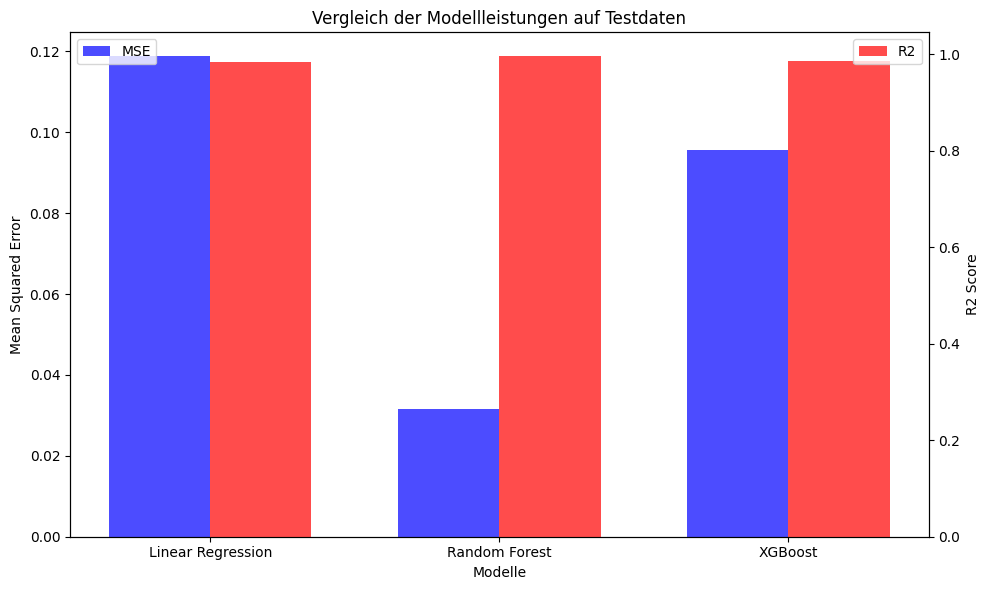

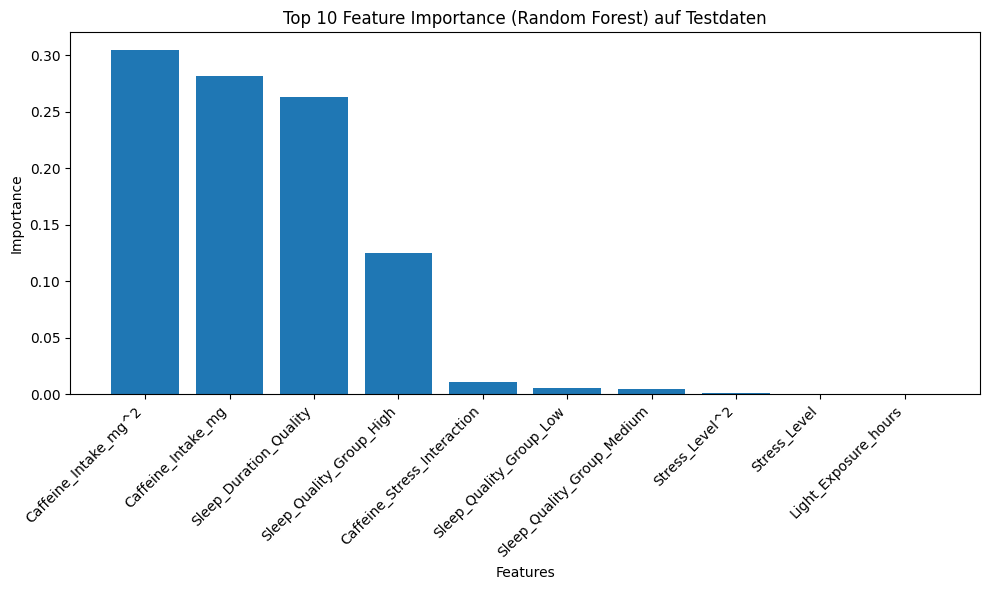

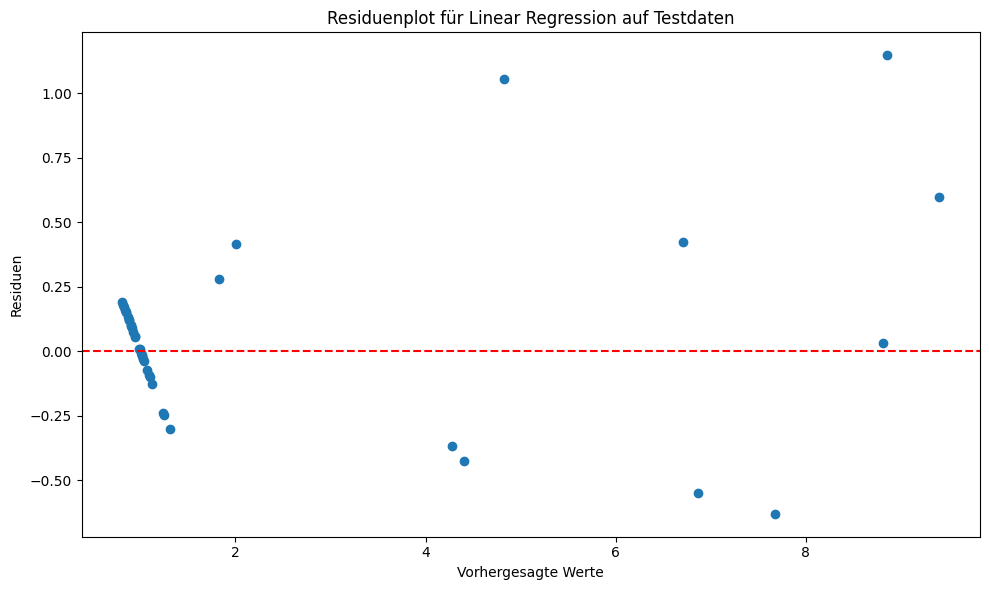

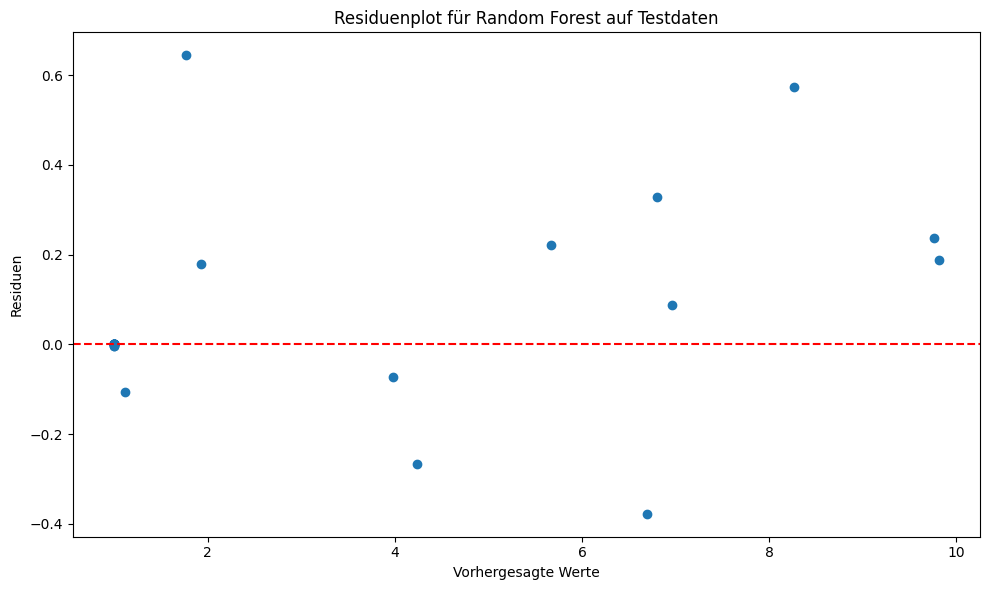

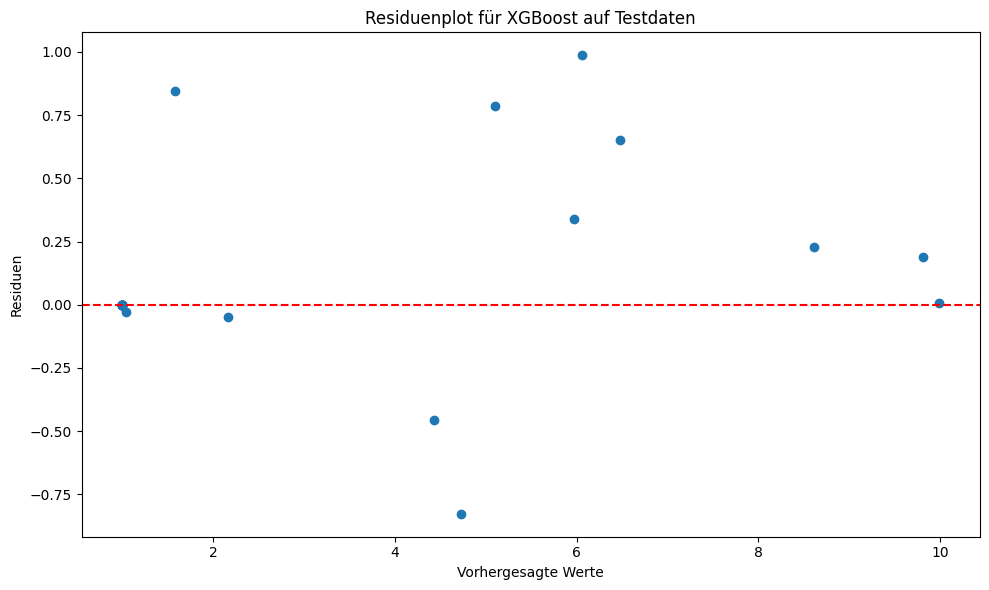

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.model_selection import train_test_split

# Pfade definieren
data_path = '../data/test_data.csv'
models_dir = 'models'

# Sicherstellen, dass der models Ordner existiert
os.makedirs(models_dir, exist_ok=True)

# 1. Daten laden
data = pd.read_csv(data_path)

# 2. Daten in Features und Ziel aufteilen
X = data.drop('Sleep_Quality_Score', axis=1)
y = data['Sleep_Quality_Score']

# 3. Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modelle definieren und trainieren
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

for name, model in models.items():
    # Modell trainieren
    model.fit(X_train, y_train)
    
    # Modell speichern
    joblib.dump(model, os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model.joblib'))
    print(f"{name} Modell trainiert und gespeichert.")

# 5. Modelle laden und evaluieren
loaded_models = {}
results = {}

for name in models.keys():
    model_path = os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model.joblib')
    loaded_models[name] = joblib.load(model_path)
    
    # Vorhersagen
    y_pred = loaded_models[name].predict(X_test)
    
    # Evaluieren
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"\nTestergebnisse für {name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# 6. Visualisierung der Testergebnisse
plt.figure(figsize=(10, 6))
names = list(results.keys())
mse_values = [results[name]['MSE'] for name in names]
r2_values = [results[name]['R2'] for name in names]

x = range(len(names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

rects1 = ax1.bar([i - width/2 for i in x], mse_values, width, label='MSE', color='b', alpha=0.7)
rects2 = ax2.bar([i + width/2 for i in x], r2_values, width, label='R2', color='r', alpha=0.7)

ax1.set_xlabel('Modelle')
ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R2 Score')
ax1.set_title('Vergleich der Modellleistungen auf Testdaten')
ax1.set_xticks(x)
ax1.set_xticklabels(names)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# 7. Feature Importance für Random Forest
if 'Random Forest' in loaded_models:
    rf_model = loaded_models['Random Forest']
    importances = rf_model.feature_importances_
    feature_importance = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Top 10 Feature Importance (Random Forest) auf Testdaten')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 8. Residuenanalyse
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.title(f'Residuenplot für {name} auf Testdaten')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()


# Untersuchen von nichtlinearen Zusammenhang zwischen Koffeinkonsum und Schlafqualität 

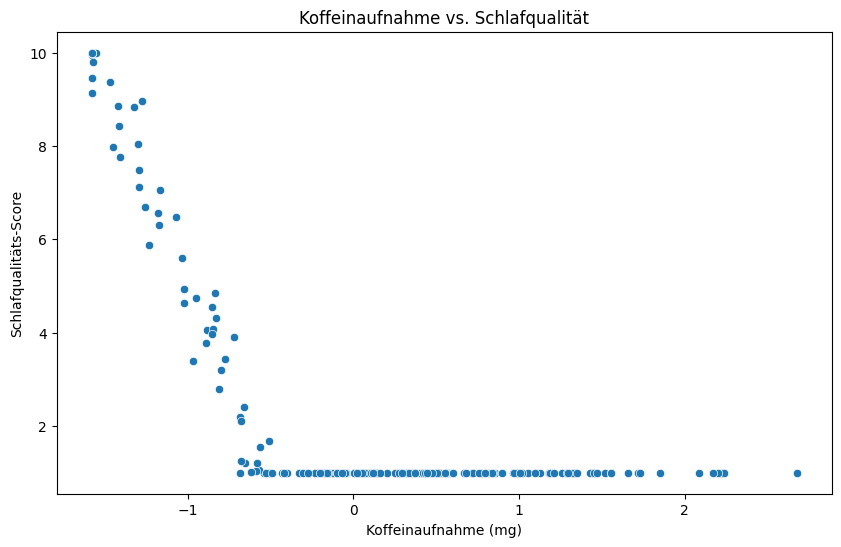

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine_Intake_mg', y='Sleep_Quality_Score', data=data)
plt.title('Koffeinaufnahme vs. Schlafqualität')
plt.xlabel('Koffeinaufnahme (mg)')
plt.ylabel('Schlafqualitäts-Score')
plt.show()


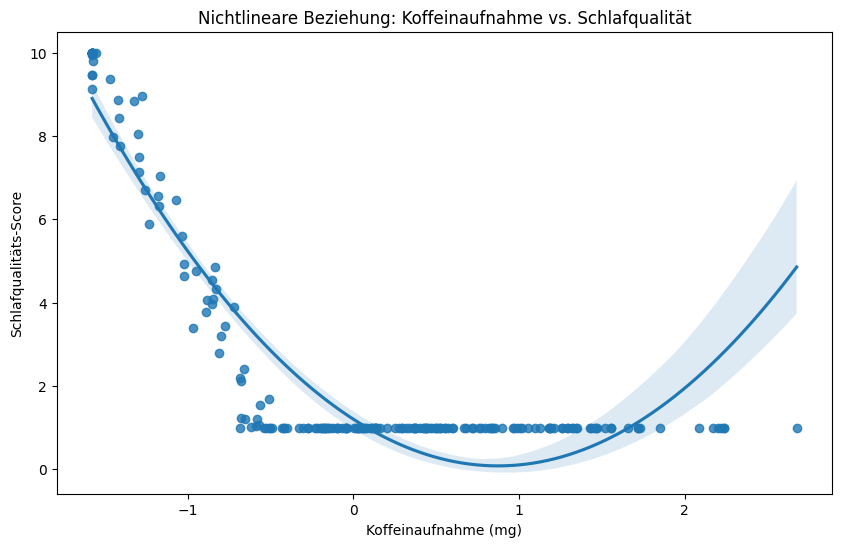

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Caffeine_Intake_mg', y='Sleep_Quality_Score', data=data, order=2)
plt.title('Nichtlineare Beziehung: Koffeinaufnahme vs. Schlafqualität')
plt.xlabel('Koffeinaufnahme (mg)')
plt.ylabel('Schlafqualitäts-Score')
plt.show()


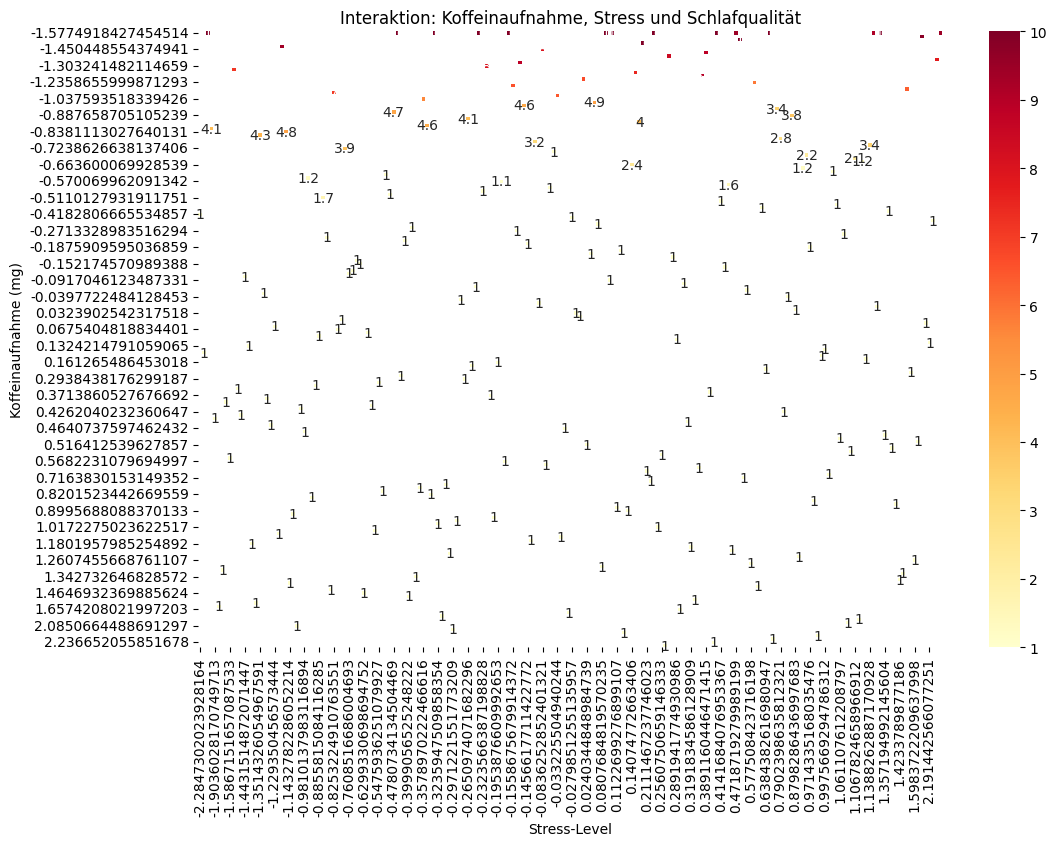

In [24]:
pivot = data.pivot_table(values='Sleep_Quality_Score', 
                         index='Caffeine_Intake_mg', 
                         columns='Stress_Level', 
                         aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Interaktion: Koffeinaufnahme, Stress und Schlafqualität')
plt.xlabel('Stress-Level')
plt.ylabel('Koffeinaufnahme (mg)')
plt.show()


# neues Modell mit nichtlinearer Beziehung zwischen Koffeinkonsum und Schlafqualität

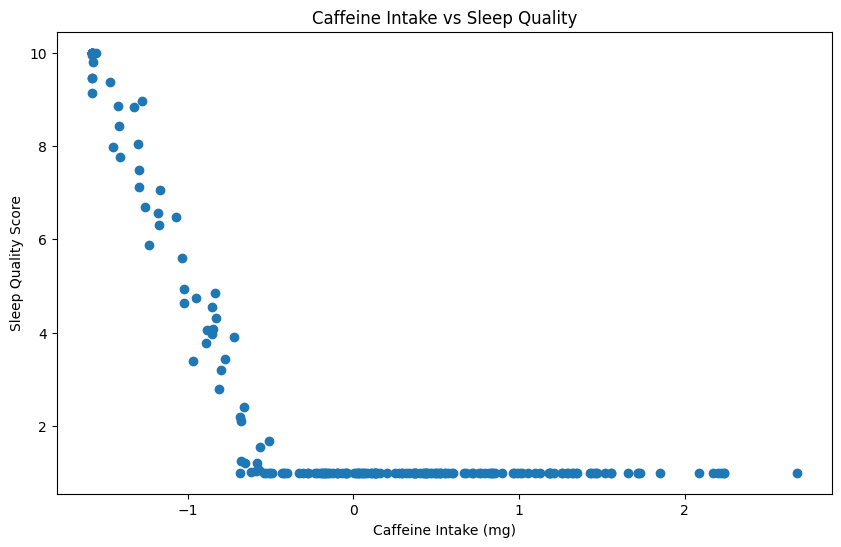

R-squared with only Caffeine_Intake_mg: 0.5514960543327598


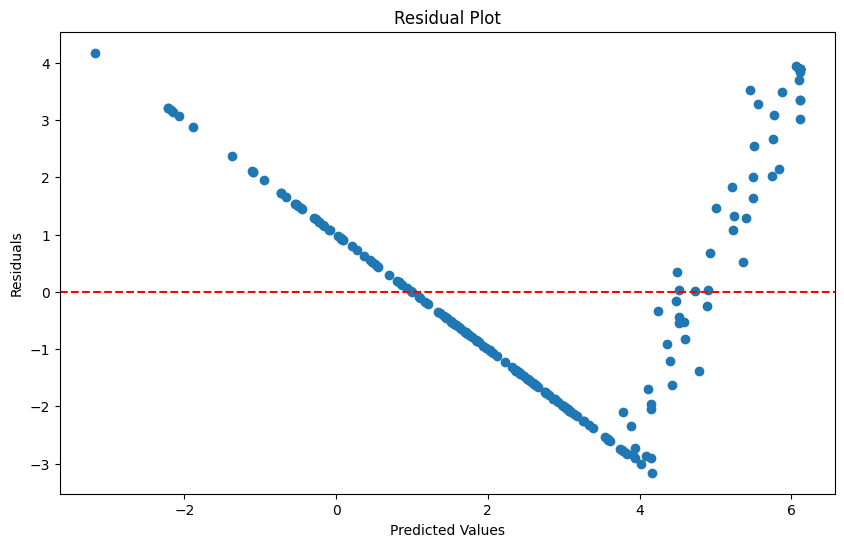

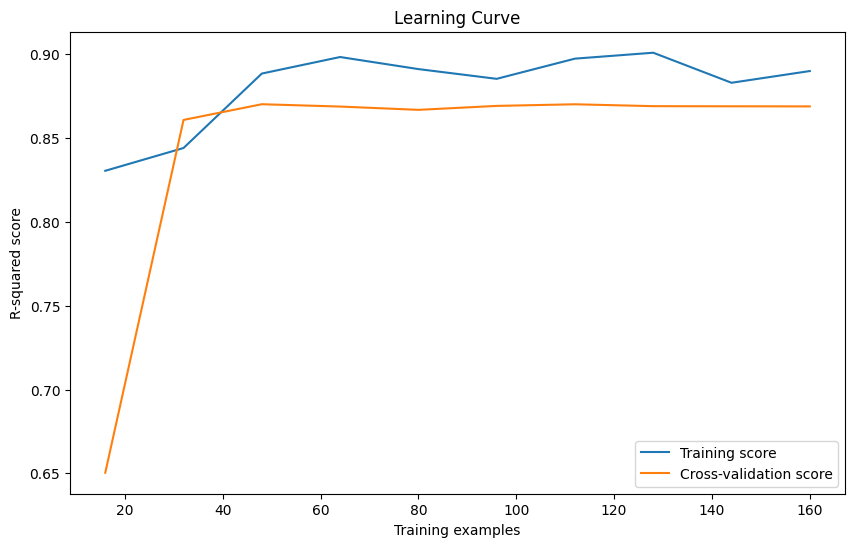

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Visualisierung
plt.figure(figsize=(10, 6))
plt.scatter(X['Caffeine_Intake_mg'], y)
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Sleep Quality Score')
plt.title('Caffeine Intake vs Sleep Quality')
plt.show()

# Modell nur mit Caffeine_Intake_mg
X_simple = X[['Caffeine_Intake_mg']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y)
print(f"R-squared with only Caffeine_Intake_mg: {model_simple.score(X_simple, y)}")

# Residuenanalyse
y_pred = model_simple.predict(X_simple)
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Lernkurve
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R-squared score')
plt.title('Learning Curve')
plt.legend()
plt.show()


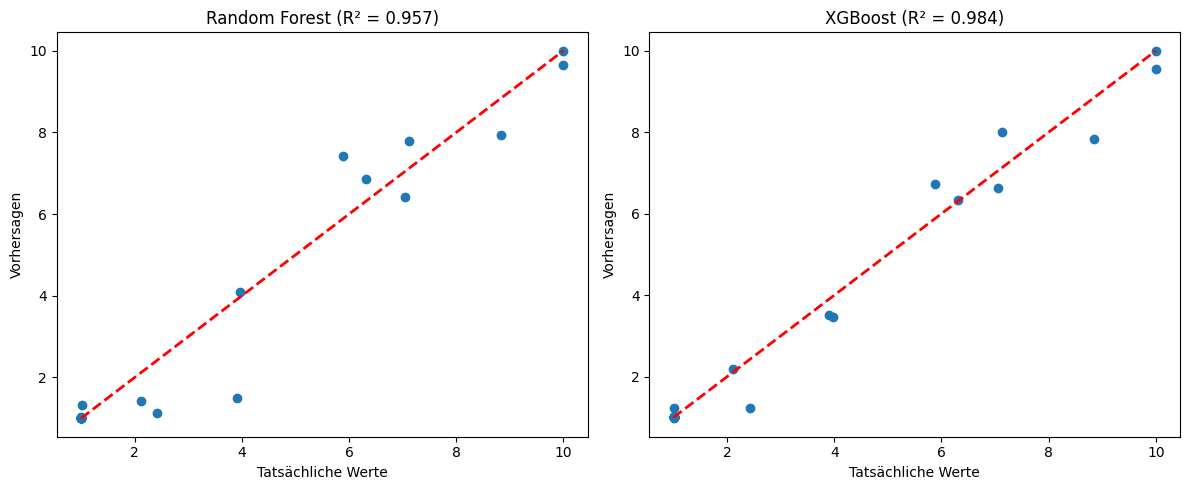

Random Forest:
MSE: 0.3109
R²: 0.9571
CV Scores: 0.9831 (+/- 0.0205)

XGBoost:
MSE: 0.1194
R²: 0.9835
CV Scores: 0.9820 (+/- 0.0145)

Random Forest Feature Importance:
                       feature  importance
0           Caffeine_Intake_mg    0.975252
2             Caffeine_Squared    0.020262
1                 Stress_Level    0.002488
3  Caffeine_Stress_Interaction    0.001998

XGBoost Feature Importance:
                       feature    importance
0           Caffeine_Intake_mg  9.974502e-01
1                 Stress_Level  2.461892e-03
3  Caffeine_Stress_Interaction  8.752422e-05
2             Caffeine_Squared  4.969998e-07


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Annahme: X und y sind bereits definiert
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Visualisierung
plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(121)
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title(f'Random Forest (R² = {rf_r2:.3f})')

# XGBoost
plt.subplot(122)
plt.scatter(y_test, xgb_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title(f'XGBoost (R² = {xgb_r2:.3f})')

plt.tight_layout()
plt.show()

# Ergebnisse ausgeben
print("Random Forest:")
print(f"MSE: {rf_mse:.4f}")
print(f"R²: {rf_r2:.4f}")
print(f"CV Scores: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

print("\nXGBoost:")
print(f"MSE: {xgb_mse:.4f}")
print(f"R²: {xgb_r2:.4f}")
print(f"CV Scores: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")

# Feature Importance für Random Forest
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)

# Feature Importance für XGBoost
feature_importance_xgb = pd.DataFrame({'feature': X.columns, 
                                       'importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False)
print("\nXGBoost Feature Importance:")
print(feature_importance_xgb)


In [29]:
import joblib

# Modelle speichern
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(xgb_model, 'xgboost_model.joblib')
joblib.dump(model_simple, 'linear_regression_model.joblib')

print("Alle Modelle wurden erfolgreich gespeichert.")


Alle Modelle wurden erfolgreich gespeichert.
